In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import csv
import matplotlib.pyplot as plt

In [4]:
from scipy import stats

In [27]:
import math
import numpy as np
from sklearn import linear_model
import random
from random import shuffle


In [6]:
df_ON_OF = pd.read_csv("ON_OF.txt", sep='\t')

In [7]:
df_YN_ON = pd.read_csv("YN_ON.txt", sep='\t')

In [8]:
df_YF_OF = pd.read_csv("YF_OF.txt", sep='\t')

In [9]:
df_YN_YF = pd.read_csv("YN_YF.txt", sep='\t')

In [10]:
df_ON = df_ON_OF[[19,4,6,7,8,9]];

In [11]:
df_OF = df_ON_OF[[19,4,10,11,12,13]]

In [12]:
df_YN = df_YN_ON[[19,4,6,7,8,9]]

In [13]:
df_YF = df_YN_YF[[19,4,10,11,12,13]]

In [14]:
def drop_dup(d):
    d = d.drop_duplicates(subset='gene', keep='first')
    return d

def merge(d1, d2):
    return pd.merge(d1, d2, how='outer', on=['gene','width'])

def merge2(d1, d2):
    return pd.merge(d1, d2, how='outer', on='gene')

In [15]:
dft = merge(df_ON, df_OF)

In [16]:
dft = merge(dft, df_YN)

In [17]:
dft = merge(dft, df_YF)

In [18]:
dft = drop_dup(dft)

In [19]:
dft.dropna(thresh=(2), axis=0);

In [20]:
dft = dft[pd.notnull(dft).all(axis=1)]

In [21]:
df = dft

In [28]:

def coshuffle(X, Xtest):
    
    new_X = [[] for i in range(len(X))]
    new_Xtest = [[] for i in range(len(Xtest))]
    index_shuf = range(len(X[0]))
    shuffle(index_shuf)
    print index_shuf[:10]
    for i in range(len(X)):
        origX = X[i]
        for s in index_shuf:
            new_X[i].append(X[i][s])
            
    for i in range(len(Xtest)):
        origX = Xtest[i]
        for s in index_shuf:
            new_Xtest[i].append(Xtest[i][s])

    return new_X, new_Xtest, index_shuf

X, Xtest, index_shuf = coshuffle(X, Xtest)

[8469, 373, 12781, 7495, 9564, 7698, 13610, 12462, 12491, 9252]


In [143]:
?df.append

In [214]:
def init_input(df):
    
    n = 5 # number of genes 
    y = [0,0,0,1,1,1,2,2,2,3,3,3]
    Xdf = df.ix[:n,[2,3,4,6,7,8,10,11,12,14,15,16]].transpose()
    Xdf['e'] = pd.Series(y, index=Xdf.index)
    X = np.array(Xdf)
    X.transpose()
    Xtest = np.array([df.ix[:n,i] for i in [5,9,13,17]])
    return X, Xtest

X, Xtest = init_input(df)

In [215]:
Xtest

array([[  3.30886113e+00,   7.41346792e-02,   8.43898778e-01,
          1.03611029e+01,   4.58766148e+01],
       [  3.24634501e+00,   6.09193505e-02,   5.33623363e-01,
          7.38928831e+00,   5.73236539e+01],
       [  3.60157193e+00,   2.79712553e-02,   7.58754129e-01,
          1.22363573e+01,   3.92987918e+01],
       [  3.60843506e+00,   1.01058251e-01,   4.71165629e-01,
          9.29396494e+00,   4.33557900e+01]])

In [216]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,3.416110,0.097670,0.894176,10.409801,47.013339,0
1,3.009893,0.040609,0.757337,10.497557,41.137221,0
2,2.985305,0.069904,0.607386,11.710880,44.567283,0
3,3.006839,0.073475,0.480479,9.809717,42.642833,1
4,3.288298,0.023836,0.444518,9.479280,48.403478,1
5,3.362613,0.033416,0.439068,9.501984,62.760002,1
6,4.314209,0.076083,1.160905,13.010706,32.573386,2
7,3.823944,0.077795,1.262395,12.463725,35.545164,2
8,3.258348,0.014816,0.627976,12.373726,48.489444,2
9,3.543772,0.119195,0.716473,9.609895,60.372131,3


In [196]:
X.transpose()[2]

array([ 0.89417597,  0.75733704,  0.60738648,  0.48047854,  0.44451831,
        0.43906778,  1.16090458,  1.26239471,  0.6279757 ,  0.71647326,
        0.70982375,  0.40346203])

In [232]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,3.416110,0.097670,0.894176,10.409801,47.013339,0
1,3.009893,0.040609,0.757337,10.497557,41.137221,0
2,2.985305,0.069904,0.607386,11.710880,44.567283,0
3,3.006839,0.073475,0.480479,9.809717,42.642833,1
4,3.288298,0.023836,0.444518,9.479280,48.403478,1
5,3.362613,0.033416,0.439068,9.501984,62.760002,1
6,4.314209,0.076083,1.160905,13.010706,32.573386,2
7,3.823944,0.077795,1.262395,12.463725,35.545164,2
8,3.258348,0.014816,0.627976,12.373726,48.489444,2
9,3.543772,0.119195,0.716473,9.609895,60.372131,3


In [236]:
X

array([[  3.41610974e+00,   9.76697565e-02,   8.94175966e-01,
          1.04098005e+01,   4.70133389e+01,   0.00000000e+00],
       [  3.00989350e+00,   4.06094757e-02,   7.57337035e-01,
          1.04975571e+01,   4.11372210e+01,   0.00000000e+00],
       [  2.98530474e+00,   6.99040154e-02,   6.07386480e-01,
          1.17108804e+01,   4.45672835e+01,   0.00000000e+00],
       [  3.00683948e+00,   7.34749232e-02,   4.80478537e-01,
          9.80971684e+00,   4.26428333e+01,   1.00000000e+00],
       [  3.28829824e+00,   2.38356962e-02,   4.44518309e-01,
          9.47927995e+00,   4.84034779e+01,   1.00000000e+00],
       [  3.36261279e+00,   3.34164828e-02,   4.39067778e-01,
          9.50198383e+00,   6.27600020e+01,   1.00000000e+00],
       [  4.31420866e+00,   7.60825197e-02,   1.16090458e+00,
          1.30107056e+01,   3.25733862e+01,   2.00000000e+00],
       [  3.82394407e+00,   7.77945686e-02,   1.26239471e+00,
          1.24637249e+01,   3.55451639e+01,   2.00000000e+00],


In [241]:
np.append(X[:,[0,1,2]],X[:,[4,5]], axis = 0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [249]:
X

array([[  3.41610974e+00,   9.76697565e-02,   8.94175966e-01,
          1.04098005e+01,   4.70133389e+01,   0.00000000e+00],
       [  3.00989350e+00,   4.06094757e-02,   7.57337035e-01,
          1.04975571e+01,   4.11372210e+01,   0.00000000e+00],
       [  2.98530474e+00,   6.99040154e-02,   6.07386480e-01,
          1.17108804e+01,   4.45672835e+01,   0.00000000e+00],
       [  3.00683948e+00,   7.34749232e-02,   4.80478537e-01,
          9.80971684e+00,   4.26428333e+01,   1.00000000e+00],
       [  3.28829824e+00,   2.38356962e-02,   4.44518309e-01,
          9.47927995e+00,   4.84034779e+01,   1.00000000e+00],
       [  3.36261279e+00,   3.34164828e-02,   4.39067778e-01,
          9.50198383e+00,   6.27600020e+01,   1.00000000e+00],
       [  4.31420866e+00,   7.60825197e-02,   1.16090458e+00,
          1.30107056e+01,   3.25733862e+01,   2.00000000e+00],
       [  3.82394407e+00,   7.77945686e-02,   1.26239471e+00,
          1.24637249e+01,   3.55451639e+01,   2.00000000e+00],


In [260]:
Xd = pd.DataFrame(X)

Xd2 = Xd.ix[:,[0,1,2,3]]

In [259]:
Xd

,0,1,2,3,4,5
0,3.416110,0.097670,0.894176,10.409801,47.013339,0
1,3.009893,0.040609,0.757337,10.497557,41.137221,0
2,2.985305,0.069904,0.607386,11.710880,44.567283,0
3,3.006839,0.073475,0.480479,9.809717,42.642833,1
4,3.288298,0.023836,0.444518,9.479280,48.403478,1
5,3.362613,0.033416,0.439068,9.501984,62.760002,1
6,4.314209,0.076083,1.160905,13.010706,32.573386,2
7,3.823944,0.077795,1.262395,12.463725,35.545164,2
8,3.258348,0.014816,0.627976,12.373726,48.489444,2
9,3.543772,0.119195,0.716473,9.609895,60.372131,3


In [261]:
Xd2

,0,1,2,3
0,3.416110,0.097670,0.894176,10.409801
1,3.009893,0.040609,0.757337,10.497557
2,2.985305,0.069904,0.607386,11.710880
3,3.006839,0.073475,0.480479,9.809717
4,3.288298,0.023836,0.444518,9.479280
5,3.362613,0.033416,0.439068,9.501984
6,4.314209,0.076083,1.160905,13.010706
7,3.823944,0.077795,1.262395,12.463725
8,3.258348,0.014816,0.627976,12.373726
9,3.543772,0.119195,0.716473,9.609895


In [243]:
pd.DataFrame(X[:,[0,1,2]])

,0,1,2
0,3.416110,0.097670,0.894176
1,3.009893,0.040609,0.757337
2,2.985305,0.069904,0.607386
3,3.006839,0.073475,0.480479
4,3.288298,0.023836,0.444518
5,3.362613,0.033416,0.439068
6,4.314209,0.076083,1.160905
7,3.823944,0.077795,1.262395
8,3.258348,0.014816,0.627976
9,3.543772,0.119195,0.716473


In [213]:
pd.DataFrame(Xtest)

,0,1,2,3
0,0.074135,0.843899,10.361103,45.876615
1,0.060919,0.533623,7.389288,57.323654
2,0.027971,0.758754,12.236357,39.298792
3,0.101058,0.471166,9.293965,43.355790


In [229]:

#for alpha in [0.01,0.04,0.05,0.06,0.1,0.15,0.2,0.8]:

def cycle_lasso(X, y_ind, Xtest, alpha):
    
    SSE = []
    n_gene = []
    alphas = []
    gene_ind = []
    #print Xtest
    X2 = np.append(X[:,y_ind], X[y_ind+1,:], axis=0) 
    print "X2", pd.DataFrame(X2)
    Xtest2 = False #np.append(Xtest[:,y_ind], Xtest[y_ind+1,:], axis=0)
    y = X.transpose()[y_ind]
    
    SSEt, n_coeft, alphat, genet = lasso(X2, y, Xtest2, alpha, y_ind)
    
    SSE.append(SSEt)
    n_gene.append(n_coeft)
    alphas.append(alphat)
    gene_ind.append(genet)
    
    return SSE, n_gene, alphas, gene_ind

In [230]:
SSE = []
def lasso(X, y, Xtest, alpha, y_ind):
    
    clf = linear_model.Lasso(alpha = alpha)
    print "X", pd.DataFrame(X)
    print "y", pd.DataFrame(y)
    print X.shape, y.shape
    clf.fit(X, y)
    
    pred = []
    
    #for Xt in Xtest:
    #    pred.append(clf.predict(Xt));
    #SSE = sum([(pred[i] - i)**2 for i in range(4)])
    
    coef = clf.coef_
    n_coef = len(coef[coef > 0])
    gene_index = [i for i, e in enumerate(coef) if e != 0]
    for i in range(len(gene_index)):
        if i > y_ind: gene_index[i] += 1
    return SSE, n_coef, alpha, gene_index


In [231]:
SSE_tot = []
n_gene_tot = []
alphas_tot = []
gene_ind_tot = []

for y_ind in range(3,len(X)):

    SSE, n_gene, alphas, gene_ind = cycle_lasso(X, y_ind, Xtest, alpha)
    SSE_tot.append(SSE)
    n_gene_tot.append(n_gene)
    alphas_tot.append(alphas)
    gene_ind_tot.append(gene_ind)

X2             0
0   10.409801
1   10.497557
2   11.710880
3    9.809717
4    9.479280
5    9.501984
6   13.010706
7   12.463725
8   12.373726
9    9.609895
10   9.650530
11   9.464138
12   3.288298
13   0.023836
14   0.444518
15   9.479280
16  48.403478
17   1.000000
X             0
0   10.409801
1   10.497557
2   11.710880
3    9.809717
4    9.479280
5    9.501984
6   13.010706
7   12.463725
8   12.373726
9    9.609895
10   9.650530
11   9.464138
12   3.288298
13   0.023836
14   0.444518
15   9.479280
16  48.403478
17   1.000000
y             0
0   10.409801
1   10.497557
2   11.710880
3    9.809717
4    9.479280
5    9.501984
6   13.010706
7   12.463725
8   12.373726
9    9.609895
10   9.650530
11   9.464138
(18,) (12,)


/Users/tjyacoub/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [ 1 12]

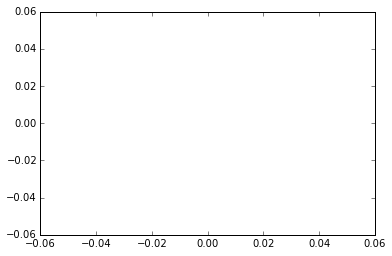

ValueError: x and y must have same first dimension

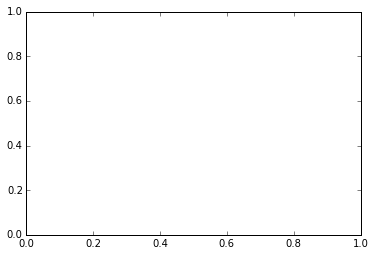

In [221]:
plt.plot(alphas, SSE)
plt.show()
for g in range(len(gene_ind)):
    plt.plot(gene_ind[g], label = alphas[g])
plt.show()
plt.plot(alphas, n_coef)

2928 0.0003039
3755 0.0005017
3898 1.6e-06
7987 0.0009066
11942 2.11e-05
11951 2.34e-05
11953 0.0001054
11959 6.8e-06
11961 6.06e-05
12167 0.0002877
12882 0.0007937
[array([ 0.09633461]), array([ 0.66293173]), array([ 2.11598438]), array([ 2.88949329])]
1.35783667373 5


/Users/tjyacoub/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/tjyacoub/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/tjyacoub/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a si

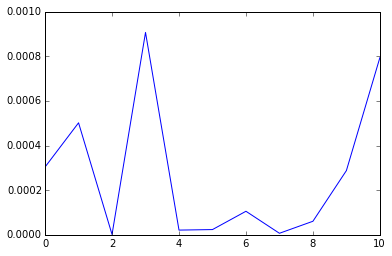

In [50]:

#print "initial X", X[0][0]
#X, Xtest, index_shuf = coshuffle(X, Xtest)
#print "new X", X[0][0]
clf = linear_model.Lasso(alpha = 0.1)
### [[one array of genes per sample], [response]]

clf.fit(X, y)
#Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
#   normalize=False, positive=False, precompute=False, random_state=None,
#   selection='cyclic', tol=0.0001, warm_start=False)

pred = []
for Xt in Xtest:
    pred.append(clf.predict(Xt));
SSE = sum([(pred[i] - i)**2 for i in range(4)])

tot = []
coef = clf.coef_
l = len(coef)
l2 = 0
check_same = []
for i in range(l):
    if coef[i] > 0:
        tot.append(coef[i])
        print i, round(coef[i],7)
        check_same.append(i)
        l2 += 0.5
l2 = int(l2)
print pred
print sum(tot[:l2])/ sum(tot[l2:]), l2
plt.plot(tot)

In [56]:
sum([(pred[i] - i)**2 for i in range(4)])

array([ 0.14855949])

In [ ]:
print l2

In [ ]:
coef = clf.coef_

In [ ]:
len(clf.coef_[clf.coef_ > 0])

In [ ]:
x

In [ ]:
state_dict = {'AT2.young.flu.20150416': 'YF', 'AT2.old.naive.20150416': 'ON', 
                 'AT2.old.flu.20150416': 'OF', 'AT2.young.naive.20150416': 'YN'}

In [ ]:
def rename_cols(df, state_dict):
    cols = df.columns
    temp_cols = list(cols)
    #print temp_cols
    for c in range(len(cols)):
        state_name = cols[c][:-2]
        #sample_num = cols[c][-2:]
        total_name = cols[c]
        #print state_name
        if state_name in state_dict:
            new_state_name = state_dict[state_name]
            new_col = total_name.replace(state_name, new_state_name)
            temp_cols[c] = new_col
            #print abb_pair_dict[state_name]
    df.columns = temp_cols
    #print temp_cols
    return df
        
    

In [ ]:
df = rename_cols(df, state_dict)

In [ ]:
len(df)

In [ ]:
def df_to_names(df):
    
    name_dict = {}
        
    for i in range(2,len(df.columns)):
        name = df.columns[i][:-2]
        if name in name_dict:
            name_dict[name].append(i)
        else:
            name_dict[name] = [i]
            
    return name_dict

In [ ]:
name_dict = df_to_names(df)

In [ ]:
def unique(a, b):
    return list([a[i] for i in range(1,len(a)) if a[i] not in b])
def intersect(a, b):
    return list(set(a) & set(b))
def union(a, b):
    return list(set(a) | set(b))
def intersect3(a, b, c):
    return list(set(a) & set(b) & set(c))

def unique3(a, b, c, index):
    uniques = [0 for i in range(3)]
    uniques[0] = list([a[i] for i in range(1,len(a)) if a[i] not in b and a[i] not in c])
    uniques[1] = list([b[i] for i in range(1,len(b)) if b[i] not in a and b[i] not in c])
    uniques[2] = list([c[i] for i in range(1,len(c)) if c[i] not in a and c[i] not in b])
    return uniques[index]


In [ ]:
unique3([1,2,3],[4,5,6],[4,6,7])

In [ ]:
def t_stat(df, names):
    
    ### Df has samples only, no gene
    #print df
    #names = df_to_names(df)
    #print "t-stat names", names #names[0], name_dict[names[0]]
    n_samples1 = len(name_dict[names[0]])
    n_samples2 = len(name_dict[names[1]])
    
    index1 = 1
    index2 = index1 + n_samples1
    
    width = df['width']
    #print "nsamps", n_samples1, n_samples2
    indices1 = [index1 + i for i in range(n_samples1)]
    indices2 = [index2 + i for i in range(n_samples2)]
    
    values1 = [df[df.columns[i]] for i in indices1]
    values2 = [df[df.columns[i]] for i in indices2]
    
    mean1 = sum(values1)/n_samples1
    mean2 = sum(values2)/n_samples2
    
    var1_num = [(values1[i] - mean1)**2 for i in range(n_samples1)]
    var2_num = [(values2[i] - mean2)**2 for i in range(n_samples2)]
    
    var1 = sum(var1_num)/(n_samples1 - 1)
    var2 = sum(var2_num)/(n_samples2 - 1)
    
    t_stat = (mean1 - mean2) / (var1/n_samples1 + var2/n_samples2)**0.5
    pval = stats.t.sf(np.abs(t_stat), n_samples1-1)*2 
    
    logfc = np.log2(mean2/mean1)
    
    diff = (mean2 - mean1) * width
    diff2 = (mean2 - mean1)
    
    return [pval, logfc, diff, mean1, diff2]

In [ ]:
### Create new temp dataframe with cols ['samp1a','samp1b','samp2a','samp2b','gene']
### Add cols for logfc, pval
def names_to_df(names):
       
    # For first name    
    #print "names to df", names
    indices = list(name_dict[names[0]])
    l = len(indices)
    indices.insert(0,1)
    indices.insert(0,0)
    #print indices
    df_temp1 = df.ix[:,indices]
    #print df_temp1
    
    # For second name
    indices = list(name_dict[names[1]])
    l = len(indices)
    indices.insert(0,1)
    indices.insert(0,0)
    df_temp2 = df.ix[:,indices]
    
    dft = pd.merge(df_temp1, df_temp2, how='outer', on=['gene','width']);
    
    dft = dft.ix[1:];
    dft_float = dft.ix[:,1:].astype('float');
    dft_float = dft_float[dft_float > 0];

    #print dft_float
    dft['pval'], dft['logfc'], dft['diff'], dft['mean'], dft['diff_only'] = t_stat(dft_float, names)

    return dft
    #dft = merge(dft)

In [ ]:
pairs_rel = [['YN','ON'],['YN','YF'],['ON','OF']]

In [ ]:
tdf = names_to_df(pairs[0])

In [ ]:
tdf = tdf[tdf['pval'] < 0.05];

In [ ]:
tdfup = tdf[tdf['diff'] > 0]
tdfdn = tdf[tdf['diff'] < 0]

In [ ]:
nup = np.sum(tdfup['diff'])
ndn = np.sum(tdfdn['diff'])

In [ ]:
def reset_pairs(df):
    
    name_dict = df_to_names(df)
    names = name_dict.keys()
    n_names = len(names)
    pairs = [[[names[i], names[j]] for i in range(n_names) if i != j] for j in range(n_names)]
    pairs = [pair for sublist in pairs for pair in sublist]
    return pairs

pairs = reset_pairs(df)

In [ ]:
name_dict

In [ ]:
def filter_df(df, pcut = 0.05, fcut = 0.15, dcut = 25, mcut = 5):
    
    ### Filter all by pvalue
    df = df[df['pval'] < pcut]
    
    ## Highly upregulated
    df1 = df[df['diff'] > dcut]
    
    ## Highly downregulated
    df2 = df[df['diff'] < -dcut]
    
    ## Weakly upregulated
    df3 = df[df['diff'] < dcut]
    df3 = df3[df3['diff'] > 0]
    
    ## Weakly downregulated
    df4 = df[df['diff'] > -fcut]
    df4 = df4[df4['diff'] < 0]
    
    return [df1, df2, df3, df4]
        

In [ ]:
def filter_grps(df, pcut = 0.05, fcut = 0, dcut = 0, mcut = 0):
    
    ### Filter all by pvalue
    df = df[df['pval'] < pcut]
    
    ## Highly upregulated
    df1 = df[df['diff'] > dcut]
    df1 = df1[df1['mean'] > mcut]
    df1 = df1[df1['logfc'] > fcut]
    
    ## Highly downregulated
    df2 = df[df['diff'] < dcut]
    df2 = df2[df2['mean'] > mcut]
    df2 = df2[df2['logfc'] < -fcut]

    return [df1, df2]
        

In [ ]:
def grp_stats(group):
    
    mean_diff = round(np.mean(group['diff']),0)
    diff_low = round(np.mean(group['diff_only']),2)
    mean_val = round(np.mean(group['mean']),2)
    tot = mean_diff*len(group)
    return [len(group), diff_low, tot/1000000, mean_val]


In [ ]:
#n_groups = 2
#for p1 in range(1,2):#len(pairs_rel)):

out1 = open('YN_YF_unique_up','w')

def common_stats(pairs):
    
    pair1 = pairs[0]
    print pair1
    df1 = names_to_df(pair1)
    df1_groups = filter_grps(df1)
    df1_genes = [group['gene'] for group in df1_groups]
    
    pair2 = pairs[1]
    print pair2
    df2 = names_to_df(pair2)
    df2_groups = filter_grps(df2)
    df2_genes = [group['gene'] for group in df2_groups]
        
    common_genes = [pd.DataFrame(intersect(df1_genes[i], df2_genes[i])) for i in range(n_groups)]
    #return df1_genes[0], df2_genes[0]
    #break
    unique_genes1 = [pd.DataFrame(unique(list(df1_genes[i]), list(df2_genes[i]))) for i in range(n_groups)]
    unique_genes2 = [pd.DataFrame(unique(list(df2_genes[i]), list(df1_genes[i]))) for i in range(n_groups)]
    
    for i in range(n_groups):
        common_genes[i].columns = ['gene']
        unique_genes1[i].columns = ['gene']
        unique_genes2[i].columns = ['gene']
    
    upgenes1 = unique(list(df1_genes[0]), list(df2_genes[0]))
    upgenes2 = unique(list(df2_genes[0]), list(df1_genes[0]))
    print "# in common", [len(common_genes[i]) for i in range(n_groups)]
    print "# unique in 1", [len(unique_genes1[i]) for i in range(n_groups)]
    print "# in group1", [len(genes) for genes in df1_genes]
        #print common_genes[0]
        ## Of the common genes, which are in first pair
        #print df1_groups[0]
    df1_common = [pd.merge(common_genes[i], df1_groups[i], how='left') for i in range(n_groups)]
    df2_common = [pd.merge(common_genes[i], df2_groups[i], how='left') for i in range(n_groups)]
    
    #@df1[~ (df1_groups[0].gene.isin(df1_common.id1) & df1.id2.isin(df2.id2))]
    
    df1_unique = [pd.merge(unique_genes1[i], df1_groups[i], how='left') for i in range(n_groups)]
    df2_unique = [pd.merge(unique_genes2[i], df2_groups[i], how='left') for i in range(n_groups)]
    
    dfs_uniq = [df1_unique, df2_unique]
    dfs_comm = [df1_common, df2_common]
    dfs_tots = [df1_groups, df2_groups]
    #dfup_comm = df1_common[0]
    #ne = (df1 != df2).any(1)
        #print "In common with pair 1"
        
        ## In
    d_graph = []
    for i in range(len(df1_groups)):
        
        if i==0: print "UPREG"
        else: print "DOWN REG"
        
        print "FIRST GROUP"
        print "Total"
        
        print grp_stats(df1_groups[i])

        print "Common"
        print grp_stats(df1_common[i])
        
        comm_1 = grp_stats(df1_common[i])[2]
        
        print "Unique"
        print grp_stats(df1_unique[i])
        
        uniq_1 = grp_stats(df1_unique[i])[2]

        d1 = [comm_1, uniq_1]
        d_graph.append(d1)
        
        print "Second Group"
        print "Total"
        print grp_stats(df2_groups[i])
        
        print "Common"
        comm_2 = grp_stats(df2_common[i])[2]
        print grp_stats(df2_common[i])
        
        print "Unique"
        uniq_2 = grp_stats(df2_unique[i])[2]
        print grp_stats(df2_unique[i])
        
        d2 = [comm_2, uniq_2]
        d_graph.append(d2)
        print '\n'
    
    return d_graph #dfs_uniq, dfs_comm, dfs_tots

  

In [ ]:
#n_groups = 2
#for p1 in range(1,2):#len(pairs_rel)):

out1 = open('YN_YF_unique_up','w')

def common_stats_graph(pairs):
    
    pair1 = pairs[0]
    print pair1
    df1 = names_to_df(pair1)
    df1_groups = filter_grps(df1, fcut=0.1)
    df1_genes = [group['gene'] for group in df1_groups]
    
    pair2 = pairs[1]
    print pair2
    df2 = names_to_df(pair2)
    df2_groups = filter_grps(df2, fcut=0.1)
    df2_genes = [group['gene'] for group in df2_groups]
    
    common_genes = [pd.DataFrame(intersect(df1_genes[i], df2_genes[i])) for i in range(n_groups)]
    #return df1_genes[0], df2_genes[0]
    #break
    unique_genes1 = [pd.DataFrame(unique(list(df1_genes[i]), list(df2_genes[i]))) for i in range(n_groups)]
    unique_genes2 = [pd.DataFrame(unique(list(df2_genes[i]), list(df1_genes[i]))) for i in range(n_groups)]
    
    for i in range(n_groups):
        common_genes[i].columns = ['gene']
        unique_genes1[i].columns = ['gene']
        unique_genes2[i].columns = ['gene']
    
    upgenes1 = unique(list(df1_genes[0]), list(df2_genes[0]))
    upgenes2 = unique(list(df2_genes[0]), list(df1_genes[0]))
    print "# in common", [len(common_genes[i]) for i in range(n_groups)]
    print "# unique in 1", [len(unique_genes1[i]) for i in range(n_groups)]
    print "# in group1", [len(genes) for genes in df1_genes]
        #print common_genes[0]
        ## Of the common genes, which are in first pair
        #print df1_groups[0]
    df1_common = [pd.merge(common_genes[i], df1_groups[i], how='left') for i in range(n_groups)]
    df2_common = [pd.merge(common_genes[i], df2_groups[i], how='left') for i in range(n_groups)]
    
    #@df1[~ (df1_groups[0].gene.isin(df1_common.id1) & df1.id2.isin(df2.id2))]
    
    df1_unique = [pd.merge(unique_genes1[i], df1_groups[i], how='left') for i in range(n_groups)]
    df2_unique = [pd.merge(unique_genes2[i], df2_groups[i], how='left') for i in range(n_groups)]
    
    dfs_uniq = [df1_unique, df2_unique]
    dfs_comm = [df1_common, df2_common]
    dfs_tots = [df1_groups, df2_groups]
    #dfup_comm = df1_common[0]
    #ne = (df1 != df2).any(1)
        #print "In common with pair 1"
        
        ## In
    p1_graph = []
    p2_graph = []
    p_graph = []
    for i in range(len(df1_groups)):
            
        if i==0: card = 1
        else: card = -1
                
        comm_1 = grp_stats(df1_common[i])[2]
 
        uniq_1 = grp_stats(df1_unique[i])[2]

        d1 = [card*comm_1, card*uniq_1]
        p_graph.append(d1)
        
        comm_2 = grp_stats(df2_common[i])[2]
  
        uniq_2 = grp_stats(df2_unique[i])[2]

        
        d2 = [card*comm_2, card*uniq_2]
        p_graph.append(d2)
    
    pd.DataFrame(p_graph, columns=['a', 'b']).plot(kind='bar',stacked=True, title = pairs)
    #plt.axhline(0, color='k')
    #return p_graph #dfs_uniq, dfs_comm, dfs_tots

  

In [ ]:
d_graph_age0 = common_stats_graph([['YN','YF'],['ON','OF']])

In [ ]:
def uniq_ratio(lst):
    return [lst[i][1]/lst[i][0] for i in range(len(lst))]

In [ ]:
d_graph_flu = common_stats_graph([['YN','YF'],['ON','OF']])

In [ ]:
pd.DataFrame(d_graph_flu).plot(kind='bar',stacked=True)

In [ ]:
pd.DataFrame(uniq_ratio(d_graph)).plot(kind='bar',stacked=True)

In [ ]:
dfY_up = dfsuniq[0][0].ix[:,[0,10,11]]
dfY_dn = dfsuniq[0][1].ix[:,[0,10,11]]
dfO_up = dfsuniq[1][0].ix[:,[0,10,11]]
dfO_dn = dfsuniq[1][1].ix[:,[0,10,11]]

In [ ]:
df2 = pd.DataFrame(np.random.rand(4, 2), columns=['a', 'b'])

In [ ]:
dfY_up_comm = dfs_comm[0][0].ix[:,[0,10,11]]
dfY_dn_comm = dfs_comm[0][1].ix[:,[0,10,11]]
dfO_up_comm = dfs_comm[1][0].ix[:,[0,10,11]]
dfO_dn_comm = dfs_comm[1][1].ix[:,[0,10,11]]

In [ ]:
dfY_up_comm.to_csv('dfY_up_comm.txt',sep='\t', index=False)
dfY_dn_comm.to_csv('dfY_dn_comm.txt',sep='\t', index=False)
dfO_up_comm.to_csv('dfO_up_comm.txt',sep='\t', index=False)
dfO_dn_comm.to_csv('dfO_dn_comm.txt',sep='\t', index=False)

In [ ]:
dfY_up.to_csv('dfY_up.txt',sep='\t', index=False)
dfY_dn.to_csv('dfY_dn.txt',sep='\t', index=False)
dfO_up.to_csv('dfO_up.txt',sep='\t', index=False)
dfO_dn.to_csv('dfO_dn.txt',sep='\t', index=False)

In [ ]:
dfs_comm, dfs_uniq, dfsgrps = common_stats([['YN','YF'],['ON','OF']])
## Commonly regulated genes used in aging and old flu are 50% higher in flu.
## CRGs comprise 20% in upreg, but only 5% in ON_OF downerg
## Much more downreg URGs 

In [ ]:
### Needs dataframe with cols ('gene', 'logfc', 'pval')

def filter_genes(df, pcut = 0.05, fcut = 1.4):
    
    df_pcut = df[df['pval'] < pcut]
    
    df_fc_up = df_pcut[df_pcut['logfc'] > fcut]
    
    df_fc_dn = df_pcut[df_pcut['logfc'] < -fcut]
    
    df_pv_up = df_pcut[df_pcut['logfc'] < fcut]
    df_pv_up = df_pv_up[df_pv_up['logfc'] > 0]
    
    df_pv_dn = df_pcut[df_pcut['logfc'] < 0]
    df_pv_dn = df_pv_dn[df_pv_dn['logfc'] > -fcut]

    fc_up_genes = df_fc_up['gene']
    fc_dn_genes = df_fc_dn['gene']
    pv_up_genes = df_pv_up['gene']
    pv_dn_genes = df_pv_dn['gene']
    
    #n_up_fc = sum(df_fc_up.ix[:,'up'])
    #n_dn_fc = sum(df_fc_dn.ix[:,'dn'])
    #n_up_pv = sum(df_pv_up.ix[:,'up'])
    #n_dn_pv = sum(df_pv_dn.ix[:,'dn'])

    return [fc_up_genes, fc_dn_genes, pv_up_genes, pv_dn_genes]


In [ ]:
def sum()

In [ ]:
def get_counts(names):
    
    dft = names_to_df(names)
    dft_genes = filter_genes(dft)
    dft_counts = [len(genes) for genes in dft_genes]
    return dft_counts
    

In [ ]:
def pair_pair_counts(name_pairs):
    
    dft1 = names_to_df(name_pairs[0])
    dft2 = names_to_df(name_pairs[1])
    
    dft1_genes = filter_genes(dft1)
    dft2_genes = filter_genes(dft2)
    
    common_genes = [intersect(dft1_genes[i], dft2_genes[i]) for i in range(len(dft1_genes))]
    common_counts = [len(genes) for genes in common_genes]
    return common_counts
    

In [ ]:
def all_counts(pairs):
    
    pairs = reset_pairs(df)
    pairs2 = list(pairs)
    
    for p in range(len(pairs)):
        #pair in pairs:
        counts = get_counts(pairs2[p])
        pairs2[p].append(counts)
        
    return pairs2

In [ ]:
def common_counts(pairs):
    
    pairs = reset_pairs(df)
    pairs_temp = list(pairs)
    data = []
    
    for p in range(len(pairs)):
        pair1 = pairs[p]
        
        for p2 in range(p+1,len(pairs)): 
            pair2 = pairs[p2]
            #if pair1 != pair2:
            counts = pair_pair_counts([pair1, pair2])
            data12 = [[pair1, pair2],[counts]]
            data.append(data12)
            
        
    return data

In [ ]:
def common_ratio(pairs):
    
    pairs = reset_pairs(df)
    pairs_temp = list(pairs)
    data = []
    
    for p in range(len(pairs)):
        pair1 = pairs[p]
        
        for p2 in range(p+1,len(pairs)): 
            pair2 = pairs[p2]
            #if pair1 != pair2:
            counts = pair_pair_counts([pair1, pair2])
            data12 = [[pair1, pair2],float(counts[0])/float(counts[1])]
            data.append(data12)
            
        
    return data

In [ ]:
def uncommon_counts(pairs):
    
    pairs = reset_pairs(df)
    pairs_temp = list(pairs)
    data = []
    
    for p in range(len(pairs)):
        pair1 = pairs[p]
        counts1 = get_counts(pair1)
        for p2 in range(p+1,len(pairs)): 
            pair2 = pairs[p2]
            #if pair1 != pair2:
            counts2 = get_counts(pair2)
            counts_pair = pair_pair_counts([pair1, pair2])
            data12 = [[pair1, counts1, pair2, counts2],[counts_pair]]
            data.append(data12)
            
    return data

In [ ]:
count_data = common_ratio(pairs)

In [ ]:
from operator import itemgetter

In [ ]:
count_data.sort(key=itemgetter(1), reverse=True) #, keyfor pairs in count_data:


In [ ]:
for data in count_data:
    if data[0][0][0] == data[0][1][0]:
        print data

In [ ]:
count_data

In [ ]:
c2 = count_data
for c in range(len(count_data)): #count_data:
    c2[c][1][0] = count_data[c][1][0][0]/count_data[c][1][0][0]
    
print count_data

In [ ]:

for data in count_data:
    if data[0][0][0] == 'ON' and 'YN' in data[0][0]:
        print data

In [ ]:

#### [state1, state2, state3, ..., stateN]
### [state1, state2, state3, ..., stateN]

### N-1 combinations for each state
### [state1-state2, state1-state3, state1-stateN ]

### N/2 * N combinations, *2 for reverse

### input dfs = [df1, df2]
def compare_edges(dfs):
    
    df1_genes = filter_genes(dfs[0])
    df2_genes = filter_genes(dfs[1])
    
    gene_totals = [[df1_genes[i], df2_genes[i]] for i in range(len(df1_genes))]
    gene_intersect = [intersect(i,j) for i,j in gene_totals]
    gene_percent = [float(len(gene_intersect[i]))/float(len(df1_genes[i])) for i in range(len(df1_genes))]
    ### What do we want?
    ### [[% up FC_1, % up FC_2],[% dn FC_1, %dn FC_1], [% up PV1, % up PV2], [% dn PV1, % dn PV2]]
    
    return gene_percent
    
    #n0 = len(dfres[k][0])
    #n1 = len(dfres[k][1])
    #ns = len(inter)
    
    #genes_shared_ct[k] = [n0, round(float(ns)/n0,3), n1, round(float(ns)/n1,3), ns]
    #gene_totals[k] = [len(dfres[k][0]),len(dfres[k][1])] 
                      #genes_unique[k] = unique(dfres[k][0],dfres[k][1])
    #gene_ratios[k] = len(genes_union

In [ ]:
#%%capture
p1 = names_to_df(pairs[0])['pval'][:10]
p2 = names_to_df(pairs[3])['pval'][:10]

In [ ]:
%%capture
al_counts(pairs)

In [ ]:
names = ["FC up", "FC down", "PV up", "PV down"]
for i in range(4):
    print names[i]
    print x[i]
    #print genes_shared_ct[i] #".2f"% genes_shared_ct[i][1] 

In [ ]:
plt.plot([0.6, 0.2, 0.6, 0.5])

In [ ]:
dft = dft[pd.notnull(dft).all(axis=1)]

In [ ]:
ncols = len(dft.columns)
gene_names = dft.ix[:,0]
for i in range(1, ncols, 4):   #ncols):
    sample1_name = dft.columns[i]
    sample_list = []
    sample1 = dft.ix[:,i]
    for j in range(1, ncols):
        
        sample2_name = dft.columns[j]
        
        sample2 = dft.ix[:,j]
        #print sample1[0], sample2[0]
        logfc = np.log(sample2/sample1)
        logfc = logfc[logfc < 100]
        upreg = len(logfc[logfc > 1.4])
        downreg = len(logfc[logfc < -1.4])
        #print sample1_name, sample2_name, upreg, downreg
        dist = upreg + downreg
        regratio = upreg - downreg
        sample_list.append([sample2_name, dist, upreg, downreg])
        
    print sample1_name
    for n in sample_list:
        print n
    #print sample_list
#        print sample1/sample2

In [ ]:
def make_tree(dfs):
    ndf = len(dfs)
    mat
    for df1_ind in range(ndf):
        for df2_ind in range(df1_ind+1,ndf):
            merged_df = pd.merge(dfs[df1_ind], dfs[df2_ind], how = 'outer', on='gene')
            
            #merged_df['ratio'] = float(merged_df[[1]]) #sum(float(merged_df[[1,2,3,4]]))
            #for gene_ind in range(len(merged_df)):
        ### GET ratios
                
        ### GET SIMILARITY
        ### [ YN [1, 0.4, 0.8. 0.7],
        ###   ON [0.6, 1, 0.9, 0.2],
        ###   YF [0.4, 0.3, 1, 0.6],
        ###   OF [0.3, 0.9, 0.1, 1]]
        
        ### TREE FIGURE
        ###      YF (2)
        ###     /
        ###  YN(1)- ON(3)- OF(4)
        
        ###  [[1,2],[1,3],[3,4]]
        
        ### START WITH
        ### [[1,2],[1,3],[1,4]]
        ### [1-2] 0.3
        ### [1-3] 0.8
        ### [1-4] 0.5
        ### Then go to 2
        ### [2-1] 0.3 (ok)
        ### [2-3] 0.9 (>[1-3], change)
                    ### [[1,2],[2,3],[1,4]]
        ### [2-4] 0.2 (<[1-4], no change)
        ### On to 3...
        ### [3-1] 0.3 (ok)
        ### [3-2] 0.1 (<[1-3], no change)
        ### [3-4] 0.9 (>[1-4], change
                    ### [[1,2],[1,3],[3,4]])
        
        ### [1-3] ok
        sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
        for i in range(ndf):
            ## Initialize tree starting with i
            tree = []
            for j in range(ndf):
                tree[j] = [i,j]
                #similarity_matrix sim
                
                
            for j in range(ndf):
                sim_ij = sim[i,j]
                for k in range(ndf):
                    sim_ik = sim[i,k]
                    if sim_ik > sim_ij:
                        tree[j] = [i,k]
                    
                
                
    
    #return merged_df
        
            
make_tree(dfs);

In [ ]:
import random
ndf = 4
sim = [[random.random() for i in range(ndf)] for j in range(ndf)]

In [ ]:
sim[2][3]

In [ ]:
def make_tree2():
    ndf = 10
    sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
    nodes = [i for i in range(ndf)]
    for i in range(ndf):
        #print "begin", i
            ## Initialize tree starting with i
        tree = []# [0 for x in range(ndf-1)]
        
        j_nodes = [z for z in range(ndf)]
        j_nodes.remove(i)
        for j in j_nodes: 
            tree.append([i,j])
                #similarity_matrix sim
                
        n_iters = 1
        for iteration in range(n_iters):
            
            #print tree
        #print "j_nodes",j_nodes
            for j in j_nodes:
            #print tree
                sim_ij = sim[i][j]
            
                k_nodes = [z for z in range(ndf)]
                k_nodes.remove(j)
                k_nodes.remove(i)
                #print "k_nodes", k_nodes
                for k in k_nodes:
                #print "j = ", j, "k=", k
                    sim_ik = sim[i][k]
                    sim_jk = sim[j][k]
                    if sim_ik > sim_jk:
                        #print j,k, "> ", i, k
                        tree[k-1] = [j,k]
                        #print tree
            #print "end iteration", iteration, tree
            #for i in range(len(tree)):
            print sum([sim[ii][jj] for ii,jj in tree])
        printsorted(tree)
make_tree2()

In [ ]:
def make_tree_rand():
    ndf = 10
    sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
    seq = [i for i in range(ndf)]

    nodes = [random.choice() for i in range(ndf)]
    n_iter = 10
    
    ### Initialize tree
    tree = []# [0 for x in range(ndf-1)]
    
    j_nodes = [z for z in range(ndf)]
    j_nodes.remove(i)
    for j in j_nodes: 
        tree.append([i,j])
                #similarity_matrix sim
    for i in range(n_iter):
        #print "begin", i
            ## Initialize tree starting with i

                
        n_iters = 1
        for iteration in range(n_iters):
            
            #print tree
        #print "j_nodes",j_nodes
            for j in j_nodes:
            #print tree
                sim_ij = sim[i][j]
            
                k_nodes = [z for z in range(ndf)]
                k_nodes.remove(j)
                k_nodes.remove(i)
                #print "k_nodes", k_nodes
                for k in k_nodes:
                #print "j = ", j, "k=", k
                    sim_ik = sim[i][k]
                    sim_jk = sim[j][k]
                    if sim_ik > sim_jk:
                        #print j,k, "> ", i, k
                        tree[k-1] = [j,k]
                        #print tree
            #print "end iteration", iteration, tree
            #for i in range(len(tree)):
            error = sum([sim[ii][jj] for ii,jj in tree])
        printsorted(tree)
make_tree_rand()

In [ ]:
def make_tree_easy():
    ndf = 10
    sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
    seq = [i for i in range(ndf)]

    nodes = [random.choice() for i in range(ndf)]
    n_iter = 10
    
    ### Initialize tree
    tree = []# [0 for x in range(ndf-1)]
    
    j_nodes = [z for z in range(ndf)]
    j_nodes.remove(i)
    for j in j_nodes: 
        tree.append([i,j])
                #similarity_matrix sim
    for i in range(n_iter):
        #print "begin", i
            ## Initialize tree starting with i

                
        n_iters = 1
        for iteration in range(n_iters):
            
            #print tree
        #print "j_nodes",j_nodes
            for j in j_nodes:
            #print tree
                sim_ij = sim[i][j]
            
                k_nodes = [z for z in range(ndf)]
                k_nodes.remove(j)
                k_nodes.remove(i)
                #print "k_nodes", k_nodes
                for k in k_nodes:
                #print "j = ", j, "k=", k
                    sim_ik = sim[i][k]
                    sim_jk = sim[j][k]
                    if sim_ik > sim_jk:
                        #print j,k, "> ", i, k
                        tree[k-1] = [j,k]
                        #print tree
            #print "end iteration", iteration, tree
            #for i in range(len(tree)):
            error = sum([sim[ii][jj] for ii,jj in tree])
        printsorted(tree)
make_tree_easy()

In [ ]:
tree = [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5]]

In [ ]:
def printsorted(tree):
    tree.sort()
    tree_dict = {}
    for i in range(len(tree)):
        if tree[i][0] not in tree_dict:
            tree_dict[tree[i][0]] = [tree[i][1]]
        else:
            tree_dict[tree[i][0]].append(tree[i][1])
        
    print tree_dict
            